Homework 5 : Yeqi Chen 
===

Phase Portraits, expoententials, and solutions

**<span style="color: darkgreen">Due Sunday May 5 at 11:59pm</span>**

**Instructions:** Make a copy of this notebook that you can edit and save. If you are using CoLab, that means clicking File>Save and then "SAVE A COPY IN DRIVE". Then, for each problem, insert your answers directly underneath the problem description as one or more `Code` or `Markdown` cells as appropriate. Every code cell should execute without errors. TAs and graders may not have resources to debug your code. When you are satisfied with your answers upload your notebook to canvas. 

**Relevant Reading**

- Read Chapters 5 and 7.
- Converting a transfer function into state space is covered in Section 5.7. The book uses what are called Signal Flow Graphs", which I am avoiding. But you might find the book's discussion of these (which starts in Chapter 5) interesting.
- Sensitivity is covered in Section 7.7.
- The use of the final value theorem to analyze disturbances is covered in Section 7.5.

In [4]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
from sympy import *
from IPython.display import display, Markdown

%matplotlib inline

# Comment out in Google colab 
init_printing(use_latex='mathjax')

All of the problems this week have to do with the following system

\begin{align}
\dot x_1 & = x_2(x_1+a) \\
\dot x_2 & = u + \sin x_1 - a x_2 \\
y & = x_1
\end{align}

where $a \approx 2$.

1. Linearization
---

Find a linear state space model of the system assuming ${\bf x} = 0$
and $u=0$. Is the system stable when $u=0$? Find the transfer function
corresponding to the state space model. Call this $G(s)$. This is the
plant for this homework.

taking the partial derivative of two equations for x: 
$$ \left[\begin{matrix}\dot x_1 \\ \dot x_2 \end{matrix}\right]= \quad \left[\begin{matrix}x_2 & x_1-a  \\cosx_1 & -a \end{matrix}\right]\left[\begin{matrix} x_1 \\  x_2 \end{matrix}\right]$$

since X = 0 and u = 0, the matrix equals: 
$$ \left[\begin{matrix}\dot x_1 \\ \dot x_2 \end{matrix}\right]= \quad \left[\begin{matrix}0 & -a  \\1 & -a \end{matrix}\right]\left[\begin{matrix} x_1 \\  x_2 \end{matrix}\right]$$

if $a \approx 2$, the matrix becomes: 
$$ \left[\begin{matrix}0 & -2  \\1 & -2 \end{matrix}\right]$$
so we can calculate its eigenvalue. 
$\lambda = 1+i, 1-i$, since the real part is positive, so it's a unstable spiral point. 

we get the matrix A = $ \left[\begin{matrix}0 & -2  \\1 & -2 \end{matrix}\right]$, B = $\quad \left[\begin{matrix}0 \\1\end{matrix}\right]$, C = $\quad \left[\begin{matrix}1 &0\end{matrix}\right]$

In [5]:
#Transfer function G(s)
var("s")
A = Matrix([[0,-2],[1,-2]])
B = Matrix([[0],[1]])
C = Matrix([[1,0]])
Phi = (s*eye(2)-A).inv()
Phi
T = C*Phi*B
T.simplify()
T

⎡     -2      ⎤
⎢─────────────⎥
⎣s⋅(s + 2) + 2⎦

2. Interconnections
---

Consider a controller of the form $G_c = K_p + K_D s$ (this is called
*proportional-derivative* or PD control). Assume the following interconnection:

<img width=55% src="https://raw.githubusercontent.com/klavins/ECE447/master/images/hw5-fig.png">

Find the closed-loop transfer function $T(s) = Y(s)/R(s)$ (assuming
$D(s) = 0$ and $N(s) = 0$). Also find a state space model ($A$, $B$
and $C$ matrices) for the closed-loop system.

Assuming D(s) and N(s) = 0, so the system equation is 
$(R(s) - Y(s))*G_c(s)*G(s) = Y(s)$, so  T(s) = Y(s)/R(s) = $\frac {G_c(s)G(s)}{1-G_c(s)G(s)}$
$$ = \frac{(K_p+K_Ds)*-\frac{2}{s^2+2s+2}}{1-(K_p+K_Ds)*-\frac{2}{s^2+2s+2}}$$
$$ = \frac{-2K_ds-2K_p}{s^2+(2+2K_d)s+2+2K_p}$$

calculate the matrices in conical form: 
we get the matrix A = $ \left[\begin{matrix}-2K_d-2 & 1  \\-2K_p-2& 0 \end{matrix}\right]$, B = $\quad \left[\begin{matrix}-2K_d \\-2K_p\end{matrix}\right]$, C = $\quad \left[\begin{matrix}1 &0\end{matrix}\right]$

3. Steady State Error
---

In terms of $K_p$ and $K_d$, find the steady state error of the
closed-loop system $T(s)$ when $R(s)$ is 

- (a) a unit impulse and 
- (b) a unit step input.

How should the gains $K_p$ and $K_d$ be chosen to
ensure that both of these errors are minimized?

## a.
if the input is a unit impulse, then Y(s) = R(s) T(s), where R(s) = 1 for impulse function; so $$Y(s) =   \frac{-2K_ds-2K_p}{s^2+(2+2K_d)s+2+2K_p}$$;  
$$e(s)= R(s) -Y(s) = 1-\frac{-2K_ds-2K_p}{s^2+(2+2K_d)s+2+2K_p}$$;using the final value theorm,$$e(\infty) =  \lim_{s \rightarrow 0} s E(s) = \frac{-2K_ds^2-2K_ps}{s^2+(2+2K_d)s+2+2K_p}$$
$$ = \frac {0}{2+2K_p}= 0$$. Since the steady-state error is already 0, K_p can be any arbitrary numbers.  

## b.
if the input is a unit step input, then Y(s) = R(s) T(s), where R(s) = $\frac{1}{s}$ for impulse function; so $$Y(s) = \frac{1}{s} * \frac{-2K_ds-2K_p}{s^2+(2+2K_d)s+2+2K_p}$$;  
$$e(s)= R(s) -Y(s) = \frac{1}{s}- \frac{1}{s} *\frac{-2K_ds-2K_p}{s^2+(2+2K_d)s+2+2K_p}$$;using the final value theorm,$$e(\infty) =  \lim_{s \rightarrow 0} s E(s) =1- \frac{s^2+2s+2}{s^2+(2+2K_d)s+2+2K_p}$$
$$ =1- \frac {2}{2+2K_p}= \frac{-2K_p}{2+2K_p}$$. to minimize the steady-state error, $K_p$ should be 0. 

4. Choosing Gains
---

Assuming the nominal value for $a$, find a relationship between $K_p$
and $K_d$ that ensures that the poles of $T(s)$ are both negative and
equal. Assuming $K_p = 5$, what value of $K_d$ makes both poles equal?

For the nominal value of a, we plug in $a$ as a varible, so we solve the transfer function like below: 

In [6]:
#Transfer function G(s)
var("s,a")
A = Matrix([[0,-a],[1,-a]])
B = Matrix([[0],[1]])
C = Matrix([[1,0]])
Phi = (s*eye(2)-A).inv()
Phi
T = C*Phi*B
T.simplify()
T

⎡     -a      ⎤
⎢─────────────⎥
⎣a + s⋅(a + s)⎦

So the transfer function T = $$ = \frac{-aK_ds-aK_p}{s^2+(a+aK_d)s+a+aK_p}$$
So the denomenator is $s^2+(a+aK_d)s+a+aK_p$, to let poles be repetitive negative, the polynomial should be in the form $(s+b)^2$, where $b > 0$. so $s^2 +2b +b^2 = s^2+(a+aK_d)s+a+aK_p$, so $a+aK_d = 2b, a+aK_p = b^2$. 
so the relationship between $K_p$ and $K_d$: $$\frac {(a+aK_d)^2}{4} = a+aK_p$$

Assuming $K_p$ = 5, and two poles are equal, so b doesn't need to be larger than 0; so we have the equations: 
$$a+aK_d = 2b, a+aK_p = b^2$$
$$\frac {(a+aK_d)^2}{4} = a+a*5 = 6a$$
$$a+aK_d= \pm \sqrt{\frac{6a}{4}}$$
$$ K_d = \frac {-a \pm\sqrt{\frac{6a}{4}}}{a}$$

5. Sensitivity
---

Find the sensitivities $S^G_a$. Plot the magnitudes of these
sensitivities for $s=j \omega$ as a function of $\omega$. For what
values of $\omega$ is the sensitivities less than $0.5$? Repeat the
question for $S^T_a$ using the values for $K_p$ and $K_d$ you found in
problem (4). How does changing the gains affect the sensitivity?

$$S_a^G =\frac{\partial G}{\partial a}\frac{a}{G} = \frac{s^2}{(s^2+as+a)^2}*a*\frac{s^2+as+a}{a}$$
$$ = \frac{s^2}{(s^2+as+a)}$$
$$S^G_a(j\omega) = \frac{(j\omega)^2}{((j\omega)^2+a*j\omega +a)}$$

Text(0,0.5,'$|S_T^G(i \\omega)|$')

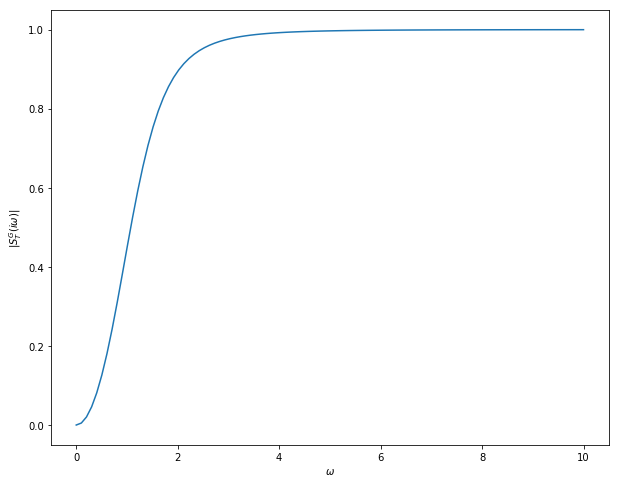

In [49]:
omega = np.linspace(0,10,100)
plt.figure(figsize=(10,8))

SaG = -omega**2 / ( -omega**2 + 2*omega*I + 2)
plt.plot(omega, np.abs(SaG))
plt.xlabel("$\omega$")
plt.ylabel("$|S_T^G(i \omega)|$")

From the graph we can see, when $\omega < 1.25$ the sensitivity is less than 0.5. 

$$S_a^T =\frac{\partial T}{\partial a}\frac{a}{T} = \frac{K_ps^3+K_ds^2}{(s^2+(a+aK_d)s+a+aK_p)^2}*a*\frac{s^2+(a+aK_d)s+a+aK_p}{-aK_ds-aK_p}$$
$$ = \frac{s^2}{s^2+(a+aK_d)s+a+aK_p}$$
$$S^G_a(j\omega) = \frac{(j\omega)^2}{((j\omega)^2+(a+aK_d)j\omega+a+aK_p)}$$

plug in $ a \approx 2$ and $ K_p = 5$, so $K_d = \frac{-2 \pm \sqrt{3}}{2}$.

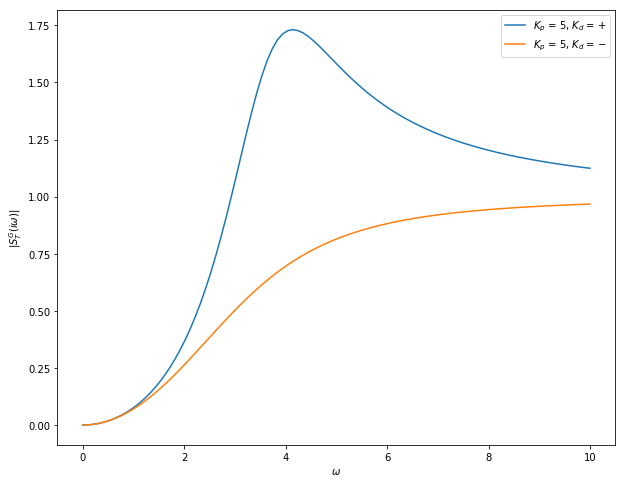

In [61]:
omega = np.linspace(0,10,100)
plt.figure(figsize=(10,8))
SaT1 = -omega**2 / ( -omega**2 + 2*(1-(-2+sqrt(3))/2)*omega*I + 2+12)
SaT2 = -omega**2 / ( -omega**2 + 2*(1-(-2-sqrt(3))/2)*omega*I + 2+12)
plt.plot(omega, np.abs(SaT1),label="$K_p$ = 5, $K_d = +$" )
plt.plot(omega, np.abs(SaT2),label="$K_p$ = 5, $K_d = -$")
plt.xlabel("$\omega$")
plt.ylabel("$|S_T^G(i \omega)|$")
plt.legend();

As we can see, the different choise of $K_d$ has different influence in sensitivity ; so with the same gain, the different parameters do influence the sensitivity.  
also, with the increase of the frequency, the stability stablizes to 1.0.

6. Disturbances and Noise
---

Let $R(s)=0$, $N(s)=0$ and $D(s) = d/s$ is a step disturbance of
magnitude $d$. What is the effect of $d$ on the steady state error? Do
the same thing assuming $R(s)=0$, $N(s)=n/s$ and $D(s)=0$.

## a 
Assuming D(s)= d/s and N(s) = R(s) = 0, so the system equation is 
$(- (Y(s)+D(s))*G_c(s)*G(s) = Y(s)$, so Y(s) = $\frac {D(s)*G_c(s)*G(s)}{1+G_c(s)G(s)}$
$$ = \frac{\frac{d}{s}*(K_p+K_Ds)*-\frac{a}{s^2+as+a}}{1+(K_p+K_Ds)*-\frac{a}{s^a+2s+a}}$$
$$ = \frac{d(-aK_ds-aK_p)}{s^3+(a+aK_d)s^2+2+2K_ps}$$
$$e(s)= R(s) -Y(s) = -\frac{d(-aK_ds-aK_p)}{s^3+(a+aK_d)s^2+a+aK_ps}$$using the final value theorm,$$e(\infty) =  \lim_{s \rightarrow 0} s E(s) = -\frac{d(-aK_ds-aK_p)}{s^2+(a+aK_d)s+a+aK_p}$$
$$ = \frac{adK_p}{a+aK_p}$$
so the steady-state error is now porpotional to the d, which means that the increase of d would leads to the increase of the error; for $K_p$, as $K_p$ gets larger, the error would approach to 
1. 

## b
Assuming D(s)= R(s) = 0 and N(s) = n/s, so the system equation is 
$((R(s)- Y(s))*G_c(s)+N(s))*G(s) = Y(s)$, so Y(s) = $\frac {(R(s)*G_c(s)+N(s))*G(s)}{1+G_c(s)G(s)}$
$$ = \frac{\frac{n}{s}*-\frac{a}{s^2+as+a}}{1+(K_p+K_Ds)*-\frac{a}{s^2+as+a}}$$
$$ = \frac{-an}{s^3+(a+aK_d)s^2+a+aK_ps}$$
$$e(s)= R(s) -Y(s) = \frac{an}{s^3+(a+aK_d)s^2+a+aK_ps}$$using the final value theorm,$$e(\infty) =  \lim_{s \rightarrow 0} s E(s) = \frac{an}{s^2+(a+aK_d)s+a+aK_p}$$
$$ = \frac{n}{1+K_p}$$
so the steady-state error is now porpotional to the d, which means that the increase of n would leads to the increase of the error; for $K_p$, as $K_p$ gets larger, the error would approach to 
0. 

7. Simulation
---

Generate the following plots of the closed
loop system using the the gains found in problem (4) and assuming a
unit step input. 
- (a) The response when $N(s) = D(s) = 0$ and $a=2$. 
- (b) The response when $N(s)=1/s$, $D(s)=0$ and $a=2$.
- (c) The response when $N(s)=0$, $D(s)=0.1/s$ and $a=2$.
- (d) The response when $N(s) = D(s) = 0$ and $a$ is 50\% greater
than its nominal value.

Do the simulations agree with your analysis in the previous problems?
What do the simulations tell you that you analysis does not?

In [97]:
#a
var("a", real=True)
var("t", real=True,positive=True)
var("s")

# Controller with one poles
G = -2/(s**2+2*s+2)
Gc = 5+(-1+sqrt(3)/2)*s
T = G*Gc / ( 1 + Gc*G )

# Step response
R1 = 1/s
Y1 = T*R1
Y1 = Y1.cancel()
Y1






  -(-2⋅s + √3⋅s + 10)  
───────────────────────
 3       2      2      
s  - √3⋅s  + 4⋅s  - 8⋅s

In [101]:
y1 = inverse_laplace_transform(Y1, s, t)
y1

⎛                                                                             
⎜                                                                             
⎜                          ____________               ____________            
⎜        ____________  t⋅╲╱ -8⋅√3 + 51            t⋅╲╱ -8⋅√3 + 51         t⋅╲╱
⎝- 640⋅╲╱ -8⋅√3 + 51 ⋅ℯ                 - 384⋅√3⋅ℯ                 - 512⋅ℯ    
──────────────────────────────────────────────────────────────────────────────
                                                                              
                                                                         _____
                                                                       ╲╱ -8⋅√

                                      ⎛             ____________⎞             
                                      ⎜  √3       ╲╱ -8⋅√3 + 51 ⎟             
____________                        t⋅⎜- ── + 2 + ──────────────⎟             
 -8⋅√3 + 51           ____________    ⎝  2         

ValueError: x and y must have same first dimension, but have shapes (1,) and (100,)

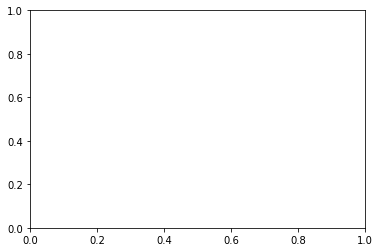

In [110]:
t = np.linspace(0,5,100)
plt.plot(y1,t)

TypeError: can't convert expression to float

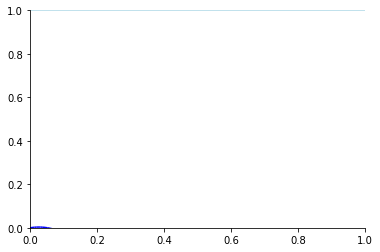

In [107]:
plots = plotting.plot(y1,1+0*t,y2,t,(t,0,5), show=false);
plots[0].line_color = 'blue'
plots[1].line_color = 'lightblue'
plots[2].line_color = 'darkgreen'
plots[3].line_color = 'lightgreen'
plots.show()

In [98]:
#b
var("a", real=True)
var("t", real=True,positive=True)
var("s")

# Controller with one poles
G = -2/(s**2+2*s+2)
Gc = 5+(-1+sqrt(3)/2)*s
T = (G*Gc+Gc) / ( 1 + Gc*G )

# Step response
R2 = 1/s
Y2 = T*R2
Y2 = Y2.cancel()
Y2


     2       2                    
- 2⋅s  + √3⋅s  + 2⋅√3⋅s + 6⋅s + 20
──────────────────────────────────
        2                         
     2⋅s  - 2⋅√3⋅s + 8⋅s - 16     

In [102]:
y2 = inverse_laplace_transform(Y2, s, t)
y2

                               ⎛    ____________         ⎞                    
                               ⎜  ╲╱ -8⋅√3 + 51        √3⎟                    
⎛        ____________     ⎞  t⋅⎜- ────────────── - 2 + ──⎟      ⎛         ____
⎜    t⋅╲╱ -8⋅√3 + 51      ⎟    ⎝        2              2 ⎠      ⎜     t⋅╲╱ -8⋅
⎝10⋅ℯ                 - 10⎠⋅ℯ                                √3⋅⎝- 4⋅ℯ        
────────────────────────────────────────────────────────── + ─────────────────
                        ____________                                          
                      ╲╱ -8⋅√3 + 51                                           

                                                                              
                                                                              
________           ____________                       ____________            
√3 + 51        t⋅╲╱ -8⋅√3 + 51      ____________  t⋅╲╱ -8⋅√3 + 51             
         + √3⋅ℯ                 + ╲╱ -8⋅√3 + 51 ⋅ℯ 

In [92]:
#b
var("a", real=True)
var("t", real=True,positive=True)
var("s")

# Controller with one poles
G = -2/(s**2+2*s+2)
Gc = 5+(-1+sqrt(3)/2)*s
T = (G*Gc+Gc) / ( 1 + Gc*G )

# Step response
R3 = 1/s
Y3= ((R3-0.1/s)*G*Gc) / ( 1 + Gc*G )
Y3 = Y3.cancel()
Y3

  -1.0⋅(-3.6⋅s + 1.8⋅√3⋅s + 18.0)   
────────────────────────────────────
     3           2        2         
2.0⋅s  - 2.0⋅√3⋅s  + 8.0⋅s  - 16.0⋅s

In [115]:
y3 = inverse_laplace_transform(Y3, s, t)
y3

                 ⎛                 ⎛                           ⎛              
                 ⎜                 ⎜      ________________  -t⋅⎝-0.5⋅√3 + 2.0 
                 ⎜13.1482519546106⋅⎝0.5⋅╲╱ -8.0⋅√3 + 51.0 ⋅ℯ                  
-(-0.9⋅√3 + 1.8)⋅⎜────────────────────────────────────────────────────────────
                 ⎜                                                            
                 ⎝                                                            

        ________________⎞              ⎛                      ________________
+ 0.5⋅╲╱ -8.0⋅√3 + 51.0 ⎠           -t⋅⎝-0.5⋅√3 + 2.0 + 0.5⋅╲╱ -8.0⋅√3 + 51.0 
                          + 9.5⋅√3⋅ℯ                                          
──────────────────────────────────────────────────────────────────────────────
                                                   ⎛        ________________  
                                                  Γ⎝- 0.5⋅╲╱ -8.0⋅√3 + 51.0  -

⎞            ⎛                      ______________

In [121]:
#D 
#I assume that 50% grater than its nominal value means a = 3. 
var("a", real=True)
var("t", real=True,positive=True)
var("s")

# Controller with one poles
G = -3/(s**3+2*s+3)
Gc = 5+(-1+sqrt(3)/2)*s
T = G*Gc / ( 1 + Gc*G )

# Step response
R4 = 1/s
Y4 = T*R4
Y4 = Y4.cancel()
Y4

    -(-6⋅s + 3⋅√3⋅s + 30)    
─────────────────────────────
   4         2       2       
2⋅s  - 3⋅√3⋅s  + 10⋅s  - 24⋅s

In [124]:
y4 = inverse_laplace_transform(Y4, s, t)
y4

NotImplementedError: sorted roots not supported over EX

## I can just find the transfer function and the time-domain function of each question, but I don't know how to draw the simulation graph, assuming it means graph in time domain. As shown above, the way I tried and the code given in lecture didn't work out. 